In [17]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [18]:
from typing_extensions import TypedDict

class State(TypedDict):
    user_input: str

In [19]:
def node1(state: State) -> State:
    print("---Node 1---", state)
    return {"user_input": state["user_input"] + "I am"}

def node2(state: State) -> State:
    print("---Node 2---", state)
    return {"user_input": state["user_input"] + " happy"}

def node3(state: State) -> State:
    print("---Node 3---", state)
    return {"user_input": state["user_input"] + " sad"}

In [33]:
import random
from typing import Literal

def decide_next_node(state: State) -> Literal["node 2", "node 3"]:
    user_input = state["user_input"]
    
    if random.random() < 0.5:
        return "node 2"
    
    return "node 3"

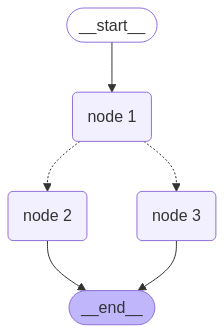

In [25]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

builder: StateGraph = StateGraph(State)

builder.add_node("node 1", node1)
builder.add_node("node 2", node2)
builder.add_node("node 3", node3)

builder.add_edge(START, "node 1")
builder.add_conditional_edges("node 1", decide_next_node)
builder.add_edge("node 2", END)
builder.add_edge("node 3", END)

graph: CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [41]:
result = graph.invoke({"user_input": "Hey, I am Kamal. "})
result

---Node 1--- {'user_input': 'Hey, I am Kamal. '}
---Node 2--- {'user_input': 'Hey, I am Kamal. I am'}


{'user_input': 'Hey, I am Kamal. I am happy'}